<a href="https://colab.research.google.com/github/Edgar-La/Machine_Learning/blob/main/CNN/ML_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(ESP)Visión Computacional con Redes Neuronales Convolucionales
#(ENG)Computational Vision with Convolutional Neural Networks

##Authors:
* Alba Bonilla David Ángel
* Cárdenas Aguilar Uriel
* Lara Arellano Edgar

##Objetivos
1. Recrear un artículo científico que trata sobre la clasificación de imágenes del dataset Caltech 101 Object Categories. 

2. Implementar tres arquitecturas diferentes sobre Redes Neuronales Convolucionales (AlexNet, ResNet y InceptionV3). 

3. Comparar los resultados (Accuracy y Loss) obtenidos con los del artículo. 

#Dataset
L. Fei-Fei, R. Fergus and P. Perona. Learning generative visual models from few training examples: an incremental Bayesian approach tested on 101 object categories. IEEE. CVPR 2004, Workshop on Generative-Model Based Vision. 2004

LINK: [Vision_Caltech_Edu](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)

Descomprimimos el Dataset que contiene 102 clases.

In [ ]:
!unzip /content/101_ObjectCategories.zip

Streaming output truncated to the last 5000 lines.
  inflating: 101_ObjectCategories/chair/image_0005.jpg  
  inflating: 101_ObjectCategories/chair/image_0006.jpg  
  inflating: 101_ObjectCategories/chair/image_0007.jpg  
  inflating: 101_ObjectCategories/chair/image_0008.jpg  
  inflating: 101_ObjectCategories/chair/image_0010.jpg  
  inflating: 101_ObjectCategories/chair/image_0011.jpg  
  inflating: 101_ObjectCategories/chair/image_0012.jpg  
  inflating: 101_ObjectCategories/chair/image_0013.jpg  
  inflating: 101_ObjectCategories/chair/image_0014.jpg  
  inflating: 101_ObjectCategories/chair/image_0016.jpg  
  inflating: 101_ObjectCategories/chair/image_0017.jpg  
  inflating: 101_ObjectCategories/chair/image_0018.jpg  
  inflating: 101_ObjectCategories/chair/image_0019.jpg  
  inflating: 101_ObjectCategories/chair/image_0020.jpg  
  inflating: 101_ObjectCategories/chair/image_0022.jpg  
  inflating: 101_ObjectCategories/chair/image_0023.jpg  
  inflating: 101_ObjectCategories/cha

Descomprimimos el Dataset que contiene únicamente 10 clases.
*Nota: Estas 10 clases pertenecen a las 102 anteriores, además, son las 10 clases con más datos.

In [ ]:
!unzip /content/10_ObjectCategories.zip

Archive:  /content/10_ObjectCategories.zip
   creating: 10_ObjectCategories/airplanes/
  inflating: 10_ObjectCategories/airplanes/image_0001.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0002.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0003.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0004.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0005.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0006.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0007.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0008.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0009.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0010.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0011.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0012.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0013.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0014.jpg  
  inflating: 10_ObjectCategories/airplanes/image_0015.jpg  
  inflating: 

##Importamos paquetes

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

##Preprocesamiento

Preprocesamiento 102 clases

In [ ]:
Datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


training_set_102 = Datagen.flow_from_directory('/content/101_ObjectCategories',
                                                 target_size=(224, 224),
                                                 batch_size= 10,
                                                 class_mode='categorical', subset='training')


test_set_102 = Datagen.flow_from_directory('/content/101_ObjectCategories',
                                                 target_size=(224, 224),
                                                 batch_size= 10,
                                                 class_mode='categorical', subset='validation')

Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


Preprocesamiento 10 clases


In [ ]:
Datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


training_set_10 = Datagen.flow_from_directory('/content/10_ObjectCategories',
                                                 target_size=(224, 224),
                                                 batch_size= 10,
                                                 class_mode='categorical', subset='training')


test_set_10 = Datagen.flow_from_directory('/content/10_ObjectCategories',
                                                 target_size=(224, 224),
                                                 batch_size= 10,
                                                 class_mode='categorical', subset='validation')

Found 2439 images belonging to 10 classes.
Found 605 images belonging to 10 classes.


##Definiendo la red AlexNet

Librerías para AlexNet

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

###Definiendo la arquitectura de la Red AlexNet

In [ ]:
def AlexNet(No_Clases = 1000):
  model = Sequential()
    
  # Primera capa Convolucional
  model.add(Convolution2D(filters = 96, input_shape = (224, 224, 3), kernel_size = (11, 11), strides = (4, 4), padding = 'valid', activation='relu'))
  # Max Pooling 
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
  # Normalizacion
  model.add(BatchNormalization())
    
  # Segunda capa Convolucional
  model.add(Convolution2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation='relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
  # Normalizacion
  model.add(BatchNormalization())
    
  # Tercera capa Convolucional
  model.add(Convolution2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation='relu'))
  # Normalizacion
  model.add(BatchNormalization())
    
  # Cuarta capa Convolucional
  model.add(Convolution2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation='relu'))
  # Normalizacion
  model.add(BatchNormalization())
    
  # Quinta capa Convolucional
  model.add(Convolution2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation='relu'))
  # Normalizacion
  model.add(BatchNormalization())

  # Max Pooling
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
  
  # "Aplanando" la matriz a una dimension
  model.add(Flatten())
    
  # Capa FC (Full Conected)
  model.add(Dense(4096, activation='relu'))
  # Dropout
  model.add(Dropout(0.4))
  # Normalizacion
  model.add(BatchNormalization())
    
  # Capa FC (Full Conected)
  model.add(Dense(4096, activation='relu'))
  # Dropout
  model.add(Dropout(0.4))
  # Normalizacion
  model.add(BatchNormalization())
    
  # Capa de salida
  model.add(Dense(No_Clases, activation='softmax'))

  model.summary()
  
  return model

###Implementación de AlexNet para 102 clases

In [ ]:
#NOTA: Únicamente para la Red AlexNet con 102 clases se usó un batch size de 32 
training_set_102_AlexNet = Datagen.flow_from_directory('/content/101_ObjectCategories',
                                                 target_size=(224, 224),
                                                 batch_size= 32,
                                                 class_mode='categorical', subset='training')


test_set_102_AlexNet = Datagen.flow_from_directory('/content/101_ObjectCategories',
                                                 target_size=(224, 224),
                                                 batch_size= 32,
                                                 class_mode='categorical', subset='validation')

Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [ ]:
Modelo_102_AlexNet = AlexNet(102)
Modelo_102_AlexNet.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])  
Resultado_102_AlexNet = Modelo_102_AlexNet.fit(training_set_102_AlexNet, epochs = 30, validation_data = test_set_102_AlexNet, verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 384)        

###Implementación de AlexNet para 10 clases

In [ ]:
Modelo_10_AlexNet = AlexNet(10)
Modelo_10_AlexNet.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'])  
Resultado_10_AlexNet = Modelo_10_AlexNet.fit(training_set_10, epochs = 30, validation_data = test_set_10,verbose = 1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 384)        

##Graficas obtenidas con la Red AlexNet

###Graficando los resultados del Dataset de 102 clases

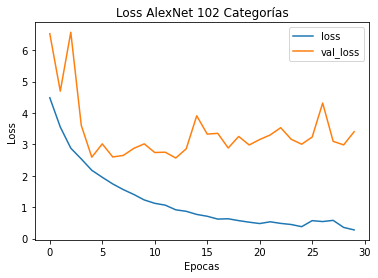

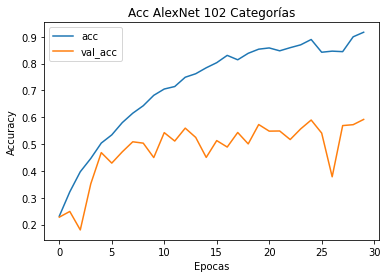

In [ ]:
%matplotlib inline
plt.plot(Resultado_102_AlexNet.history['loss'])
plt.plot(Resultado_102_AlexNet.history['val_loss'])
plt.title('Loss AlexNet 102 Categorías')
plt.ylabel('Loss')
plt.xlabel('Epocas')
plt.legend(['loss', 'val_loss'])
plt.savefig("Imagenes/Resultado_102_AlexNet_L.jpg")
plt.show()


plt.plot(Resultado_102_AlexNet.history['accuracy'])
plt.plot(Resultado_102_AlexNet.history['val_accuracy'])
plt.title('Acc AlexNet 102 Categorías')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['acc', 'val_acc'])
plt.savefig("Imagenes/Resultado_102_AlexNet_A.jpg")
plt.show()

###Graficando los resultados del Dataset de 10 clases

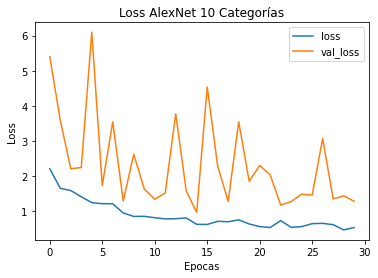

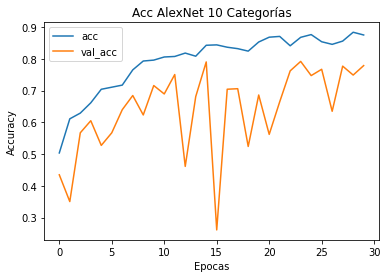

In [ ]:
%matplotlib inline
plt.plot(Resultado_10_AlexNet.history['loss'])
plt.plot(Resultado_10_AlexNet.history['val_loss'])
plt.title('Loss AlexNet 10 Categorías')
plt.ylabel('Loss')
plt.xlabel('Epocas')
plt.legend(['loss', 'val_loss'])
plt.savefig("Imagenes/Resultado_10_AlexNet_L.jpg")
plt.show()


plt.plot(Resultado_10_AlexNet.history['accuracy'])
plt.plot(Resultado_10_AlexNet.history['val_accuracy'])
plt.title('Acc AlexNet 10 Categorías')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['acc', 'val_acc'])
plt.savefig("Imagenes/Resultado_10_AlexNet_A.jpg")
plt.show()

##Red ResNet

###Implementacion para 102 clases

In [ ]:
Modelo_102_ResNet = tf.keras.applications.ResNet50( include_top=True, weights=None, input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=102)
Modelo_102_ResNet.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy, metrics = ['accuracy']) 
Resultado_102_ResNet  = Modelo_102_ResNet.fit(training_set_102, epochs = 30, validation_data=test_set_102,verbose = 1)

Epoch 1/30
736/736 [==============================] - 174s 148ms/step - loss: 4.2121 - accuracy: 0.1841 - val_loss: 15.1189 - val_accuracy: 0.0565
Epoch 2/30
736/736 [==============================] - 106s 144ms/step - loss: 3.6338 - accuracy: 0.2420 - val_loss: 3.3556 - val_accuracy: 0.2606
Epoch 3/30
736/736 [==============================] - 106s 144ms/step - loss: 3.2814 - accuracy: 0.3052 - val_loss: 4.5423 - val_accuracy: 0.1353
Epoch 4/30
736/736 [==============================] - 106s 144ms/step - loss: 2.9262 - accuracy: 0.3612 - val_loss: 3.8504 - val_accuracy: 0.2069
Epoch 5/30
736/736 [==============================] - 106s 144ms/step - loss: 2.6121 - accuracy: 0.4046 - val_loss: 3.1323 - val_accuracy: 0.3070
Epoch 6/30
736/736 [==============================] - 106s 144ms/step - loss: 2.3630 - accuracy: 0.4524 - val_loss: 3.0804 - val_accuracy: 0.3322
Epoch 7/30
736/736 [==============================] - 106s 144ms/step - loss: 2.0712 - accuracy: 0.4943 - val_loss: 3.1416 

In [ ]:
Modelo_102_ResNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

###Implementacion para 10 clases

In [ ]:
Modelo_10_ResNet = tf.keras.applications.ResNet50( include_top=True, weights=None, input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=10)
Modelo_10_ResNet.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy, metrics = ['accuracy']) 
Resultado_10_ResNet  = Modelo_10_ResNet.fit(training_set_10, epochs = 30, validation_data=test_set_10,verbose = 1)

Epoch 1/30
244/244 [==============================] - 43s 156ms/step - loss: 1.4548 - accuracy: 0.5945 - val_loss: 3.4077 - val_accuracy: 0.1835
Epoch 2/30
244/244 [==============================] - 35s 144ms/step - loss: 0.8366 - accuracy: 0.7413 - val_loss: 72.4690 - val_accuracy: 0.2347
Epoch 3/30
244/244 [==============================] - 35s 143ms/step - loss: 0.5753 - accuracy: 0.8253 - val_loss: 8.4996 - val_accuracy: 0.3785
Epoch 4/30
244/244 [==============================] - 35s 144ms/step - loss: 0.4820 - accuracy: 0.8446 - val_loss: 1.2685 - val_accuracy: 0.6017
Epoch 5/30
244/244 [==============================] - 35s 144ms/step - loss: 0.4676 - accuracy: 0.8569 - val_loss: 3.2539 - val_accuracy: 0.4628
Epoch 6/30
244/244 [==============================] - 35s 144ms/step - loss: 0.2923 - accuracy: 0.9036 - val_loss: 2.0818 - val_accuracy: 0.6248
Epoch 7/30
244/244 [==============================] - 35s 144ms/step - loss: 0.2553 - accuracy: 0.9168 - val_loss: 20.8131 - val_

##Graficas obtenidas con la Red ResNet

###Graficando los resultados del Dataset de 102 clases

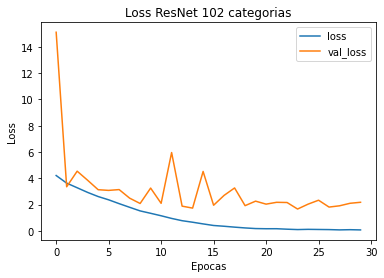

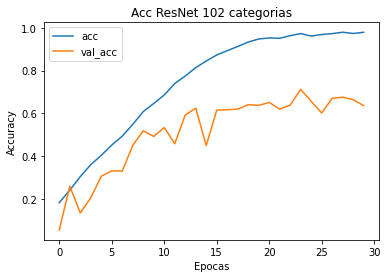

In [ ]:
plt.plot(Resultado_102_ResNet.history['loss'])
plt.plot(Resultado_102_ResNet.history['val_loss'])
plt.title('Loss ResNet 102 categorias')
plt.ylabel('Loss')
plt.xlabel('Epocas')
plt.legend(['loss', 'val_loss'])
plt.savefig("Imagenes/Resultado_102_ResNet_L.jpg")
plt.show()


plt.plot(Resultado_102_ResNet.history['accuracy'])
plt.plot(Resultado_102_ResNet.history['val_accuracy'])
plt.title('Acc ResNet 102 categorias')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['acc', 'val_acc'])
plt.savefig("Imagenes/Resultado_102_ResNet_A.jpg")
plt.show()

###Graficando los resultados del Dataset de 10 clases

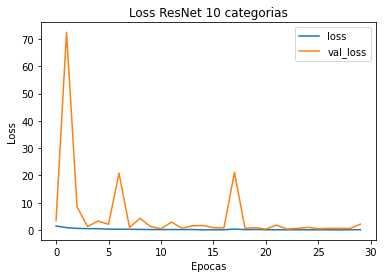

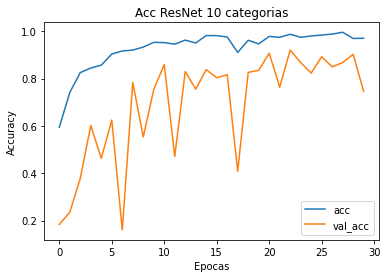

In [ ]:
plt.plot(Resultado_10_ResNet .history['loss'])
plt.plot(Resultado_10_ResNet .history['val_loss'])
plt.title('Loss ResNet 10 categorias')
plt.ylabel('Loss')
plt.xlabel('Epocas')
plt.legend(['loss', 'val_loss'])
plt.savefig("Imagenes/Resultado_10_ResNet_L.jpg")
plt.show()


plt.plot(Resultado_10_ResNet .history['accuracy'])
plt.plot(Resultado_10_ResNet .history['val_accuracy'])
plt.title('Acc ResNet 10 categorias')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['acc', 'val_acc'])
plt.savefig("Imagenes/Resultado_10_ResNet_A.jpg")
plt.show()

##Definiendo la red Inception

###Implementacion para 102 clases

In [ ]:
Modelo = tf.keras.applications.InceptionV3(include_top=True, weights=None, input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=102, classifier_activation="softmax")
Modelo.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics = ['accuracy']) 
Resultado_102  = Modelo.fit(training_set_102, epochs = 30, validation_data=test_set_102, verbose = 1)

Epoch 1/30
736/736 [==============================] - 88s 111ms/step - loss: 4.1550 - accuracy: 0.1694 - val_loss: 4.2379 - val_accuracy: 0.1275
Epoch 2/30
736/736 [==============================] - 82s 111ms/step - loss: 3.7616 - accuracy: 0.2278 - val_loss: 4.6248 - val_accuracy: 0.1488
Epoch 3/30
736/736 [==============================] - 82s 112ms/step - loss: 3.4272 - accuracy: 0.2785 - val_loss: 4.3383 - val_accuracy: 0.2153
Epoch 4/30
736/736 [==============================] - 82s 112ms/step - loss: 3.1147 - accuracy: 0.3176 - val_loss: 3.3769 - val_accuracy: 0.2796
Epoch 5/30
736/736 [==============================] - 82s 112ms/step - loss: 2.7591 - accuracy: 0.3759 - val_loss: 2.8535 - val_accuracy: 0.3490
Epoch 6/30
736/736 [==============================] - 82s 112ms/step - loss: 2.4454 - accuracy: 0.4226 - val_loss: 3.0795 - val_accuracy: 0.3462
Epoch 7/30
736/736 [==============================] - 82s 112ms/step - loss: 2.1903 - accuracy: 0.4774 - val_loss: 2.4751 - val_ac

In [ ]:
Modelo.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

###Implementacion para 10 clases

In [ ]:
Modelo_10_Inception = tf.keras.applications.InceptionV3(include_top=True, weights=None, input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=10, classifier_activation="softmax")
Modelo_10_Inception.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy, metrics = ['accuracy']) 
Resultado_10_Inception  = Modelo_10_Inception.fit(training_set_10, epochs = 30, validation_data=test_set_10, verbose = 1)

Epoch 1/30
244/244 [==============================] - 37s 128ms/step - loss: 1.3689 - accuracy: 0.6007 - val_loss: 6.0312 - val_accuracy: 0.0661
Epoch 2/30
244/244 [==============================] - 28s 113ms/step - loss: 0.7801 - accuracy: 0.7466 - val_loss: 1.5395 - val_accuracy: 0.5752
Epoch 3/30
244/244 [==============================] - 27s 112ms/step - loss: 0.6134 - accuracy: 0.8061 - val_loss: 0.9576 - val_accuracy: 0.7140
Epoch 4/30
244/244 [==============================] - 27s 111ms/step - loss: 0.4931 - accuracy: 0.8417 - val_loss: 0.8192 - val_accuracy: 0.7521
Epoch 5/30
244/244 [==============================] - 27s 112ms/step - loss: 0.4294 - accuracy: 0.8704 - val_loss: 1.1772 - val_accuracy: 0.7140
Epoch 6/30
244/244 [==============================] - 27s 112ms/step - loss: 0.3542 - accuracy: 0.8922 - val_loss: 0.8531 - val_accuracy: 0.7306
Epoch 7/30
244/244 [==============================] - 27s 112ms/step - loss: 0.3071 - accuracy: 0.9028 - val_loss: 1.0108 - val_ac

##Red InceptionV3

###Graficando los resultados del Dataset de 102 clases

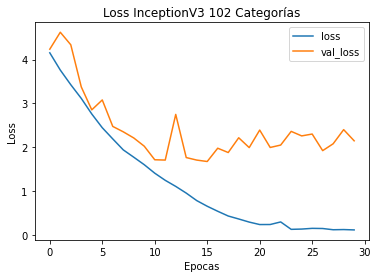

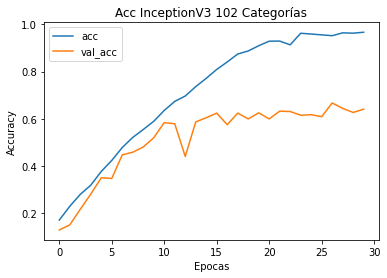

In [ ]:
%matplotlib inline
plt.plot(Resultado_102 .history['loss'])
plt.plot(Resultado_102 .history['val_loss'])
plt.title('Loss InceptionV3 102 Categorías')
plt.ylabel('Loss')
plt.xlabel('Epocas')
plt.legend(['loss', 'val_loss'])
plt.savefig("Imagenes/Resultado_102_Inception_L.jpg")
plt.show()


plt.plot(Resultado_102 .history['accuracy'])
plt.plot(Resultado_102 .history['val_accuracy'])
plt.title('Acc InceptionV3 102 Categorías')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['acc', 'val_acc'])
plt.savefig("Imagenes/Resultado_102_Inception_A.jpg")
plt.show()

###Graficando los resultados del Dataset de 10 clases

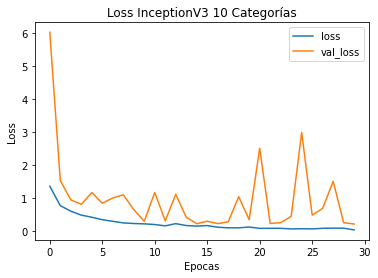

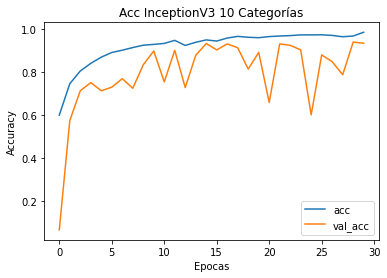

In [ ]:
%matplotlib inline
plt.plot(Resultado_10_Inception .history['loss'])
plt.plot(Resultado_10_Inception .history['val_loss'])
plt.title('Loss InceptionV3 10 Categorías')
plt.ylabel('Loss')
plt.xlabel('Epocas')
plt.legend(['loss', 'val_loss'])
plt.savefig("Imagenes/Resultado_10_Inception_L.jpg")
plt.show()


plt.plot(Resultado_10_Inception .history['accuracy'])
plt.plot(Resultado_10_Inception .history['val_accuracy'])
plt.title('Acc InceptionV3 10 Categorías')
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.legend(['acc', 'val_acc'])
plt.savefig("Imagenes/Resultado_10_Inception_A.jpg")
plt.show()

##Conclusiones generales

###Comparación de AlexNet, ResNet e Inception con 102 clases

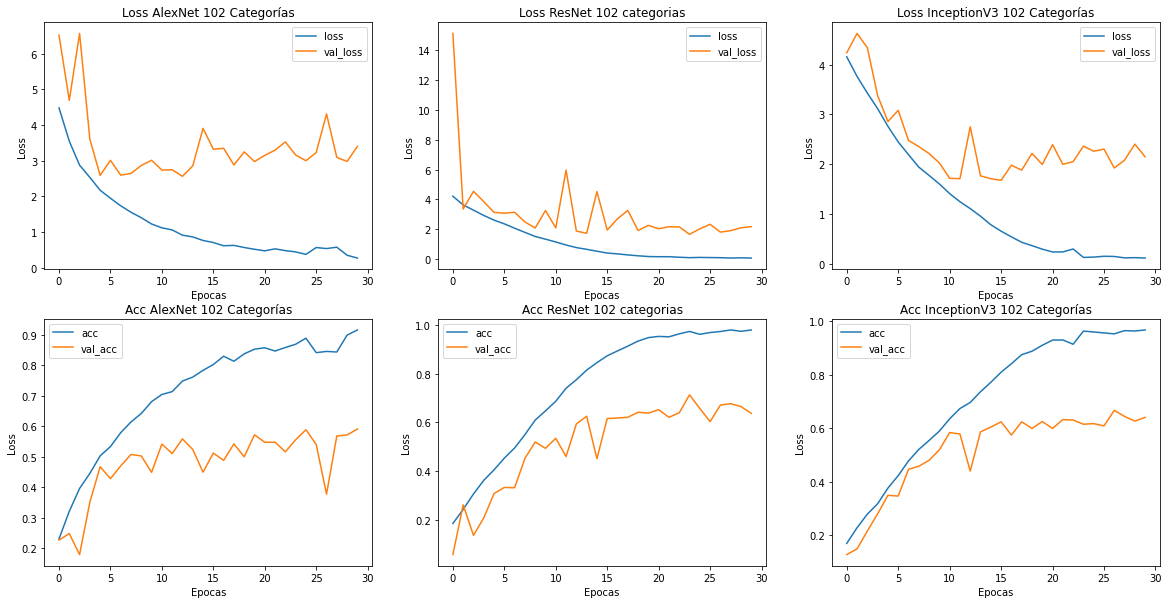

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,3,1)
ax1.plot(Resultado_102_AlexNet.history['loss'])
ax1.plot(Resultado_102_AlexNet.history['val_loss'])
ax1.set_title('Loss AlexNet 102 Categorías')
ax1.set(xlabel='Epocas', ylabel='Loss')
ax1.legend(['loss', 'val_loss'])

ax2 = fig.add_subplot(2,3,2)
ax2.plot(Resultado_102_ResNet.history['loss'])
ax2.plot(Resultado_102_ResNet.history['val_loss'])
ax2.set_title('Loss ResNet 102 categorias')
ax2.set(xlabel='Epocas', ylabel='Loss')
ax2.legend(['loss', 'val_loss'])

ax3 = fig.add_subplot(2,3,3)
ax3.plot(Resultado_102 .history['loss'])
ax3.plot(Resultado_102 .history['val_loss'])
ax3.set_title('Loss InceptionV3 102 Categorías')
ax3.set(xlabel='Epocas', ylabel='Loss')
ax3.legend(['loss', 'val_loss'])

ax4 = fig.add_subplot(2,3,4)
ax4.plot(Resultado_102_AlexNet.history['accuracy'])
ax4.plot(Resultado_102_AlexNet.history['val_accuracy'])
ax4.set_title('Acc AlexNet 102 Categorías')
ax4.set(xlabel='Epocas', ylabel='Loss')
ax4.legend(['acc', 'val_acc'])

ax5 = fig.add_subplot(2,3,5)
ax5.plot(Resultado_102_ResNet.history['accuracy'])
ax5.plot(Resultado_102_ResNet.history['val_accuracy'])
ax5.set_title('Acc ResNet 102 categorias')
ax5.set(xlabel='Epocas', ylabel='Loss')
ax5.legend(['acc', 'val_acc'])

ax6 = fig.add_subplot(2,3,6)
ax6.plot(Resultado_102 .history['accuracy'])
ax6.plot(Resultado_102 .history['val_accuracy'])
ax6.set_title('Acc InceptionV3 102 Categorías')
ax6.set(xlabel='Epocas', ylabel='Loss')
ax6.legend(['acc', 'val_acc'])


fig.savefig('Imagenes/Comparacion_102_clases.png')

###Comparación de AlexNet, ResNet e Inception con 10 clases

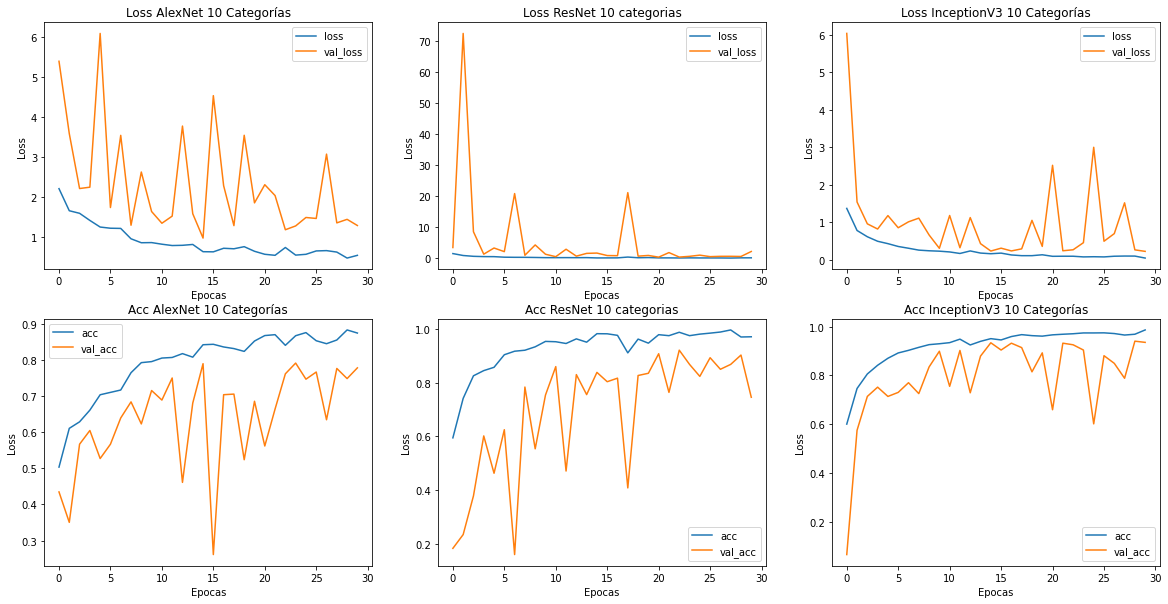

In [ ]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,3,1)
ax1.plot(Resultado_10_AlexNet.history['loss'])
ax1.plot(Resultado_10_AlexNet.history['val_loss'])
ax1.set_title('Loss AlexNet 10 Categorías')
ax1.set(xlabel='Epocas', ylabel='Loss')
ax1.legend(['loss', 'val_loss'])

ax2 = fig.add_subplot(2,3,2)
ax2.plot(Resultado_10_ResNet.history['loss'])
ax2.plot(Resultado_10_ResNet.history['val_loss'])
ax2.set_title('Loss ResNet 10 categorias')
ax2.set(xlabel='Epocas', ylabel='Loss')
ax2.legend(['loss', 'val_loss'])

ax3 = fig.add_subplot(2,3,3)
ax3.plot(Resultado_10_Inception .history['loss'])
ax3.plot(Resultado_10_Inception .history['val_loss'])
ax3.set_title('Loss InceptionV3 10 Categorías')
ax3.set(xlabel='Epocas', ylabel='Loss')
ax3.legend(['loss', 'val_loss'])

ax4 = fig.add_subplot(2,3,4)
ax4.plot(Resultado_10_AlexNet.history['accuracy'])
ax4.plot(Resultado_10_AlexNet.history['val_accuracy'])
ax4.set_title('Acc AlexNet 10 Categorías')
ax4.set(xlabel='Epocas', ylabel='Loss')
ax4.legend(['acc', 'val_acc'])

ax5 = fig.add_subplot(2,3,5)
ax5.plot(Resultado_10_ResNet.history['accuracy'])
ax5.plot(Resultado_10_ResNet.history['val_accuracy'])
ax5.set_title('Acc ResNet 10 categorias')
ax5.set(xlabel='Epocas', ylabel='Loss')
ax5.legend(['acc', 'val_acc'])

ax6 = fig.add_subplot(2,3,6)
ax6.plot(Resultado_10_Inception .history['accuracy'])
ax6.plot(Resultado_10_Inception .history['val_accuracy'])
ax6.set_title('Acc InceptionV3 10 Categorías')
ax6.set(xlabel='Epocas', ylabel='Loss')
ax6.legend(['acc', 'val_acc'])


fig.savefig('Imagenes/Comparacion_10_clases.png')

In [ ]:
!tar -cvf Imagenes.tar Imagenes/

Imagenes/
Imagenes/Resultado_102_ResNet_L.jpg
Imagenes/Resultado_102_Inception_L.jpg
Imagenes/Resultado_102_AlexNet_L.jpg
Imagenes/Resultado_10_AlexNet_A.jpg
Imagenes/Resultado_10_Inception_A.jpg
Imagenes/Resultado_10_Inception_L.jpg
Imagenes/Resultado_102_Inception_A.jpg
Imagenes/Resultado_102_AlexNet_A.jpg
Imagenes/Resultado_102_ResNet_A.jpg
Imagenes/Resultado_10_ResNet_A.jpg
Imagenes/Resultado_10_ResNet_L.jpg
Imagenes/Comparacion_102_clases.png
Imagenes/Resultado_10_AlexNet_L.jpg
Imagenes/Comparacion_10_clases.png
